<a href="https://colab.research.google.com/github/PONKAS/Machine-Learning-Projects/blob/main/Machien_Learning_Crash_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a workbook tracking my progress on Machine Learning journey.
I plan starting 02-Oct-2023 and dedicate at least 1 hour every work day.


In [1]:
import tensorflow as tf


**MACHINE LEARNING CRASH COURSE**

SUPERVISED MACHINE LEARNING

systems learn:
*   combine input
*   produce predictions

Labels - typically represented by variable **y**
Features - input variables {x1,x2,..xn}
model - predicts

**Models**
Regression Model - predicts continous values
Classification Model - predicts discrete values

Linear Regression - best fits a straight line to a dataset
 - Loss Function- L2 Loss AKA Squared Loss - square of the difference between label and prediction
 -Mean Square Error - MSE - average of the sqaure losses.






**FreeCodeCamp Tensorflow - Introduction to Machine Learning**

03-10-2023


AI - Artificial Intelligence

 - effort to automate intellectual tasks


 **Tensors**
  - a generalization of vectors and matrices
  - rank/degree - number of dimensions in a tensor
  - Shape - amount of elements that exist in each dimension
  - types of tensors - constant,variable,placeholder,sparseTensor




In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

t = tf.zeros([5,5,5,5])
##print(t)
t = tf.reshape(t,[125,-1])
print(t)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>
tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [

**ALGORITHMS**
- Linear Regression
-Classification.
- Clustering
-Hidden Markov Models

**Linear Regression**
- most basic form of machine learning and is used to predict numerical values




(0.0, 6.0, 0.0, 20.0)

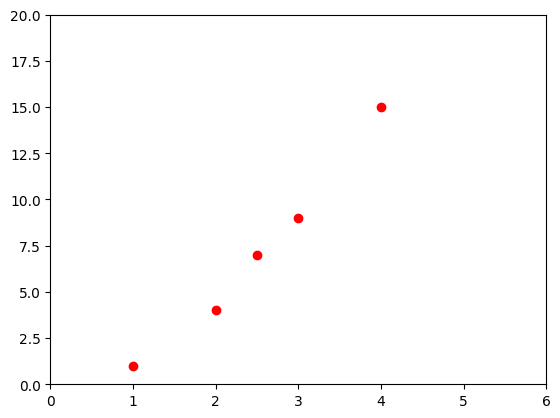

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x,y, 'ro')
plt.axis([0, 6, 0, 20])

Now to add a line of best fit

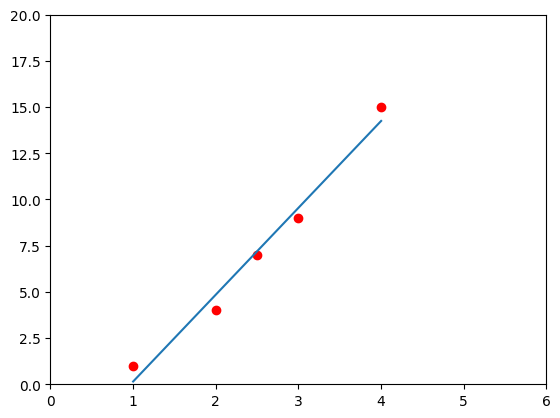

In [4]:
plt.plot(x,y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

showing linear regression


In [5]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from IPython.display import clear_output
from six.moves import urllib_error
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


Data : titanic data


In [7]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [8]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<Axes: >

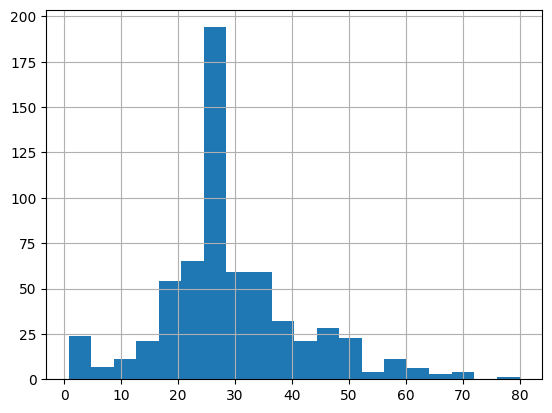

In [9]:
dftrain.age.hist(bins=20)

<Axes: >

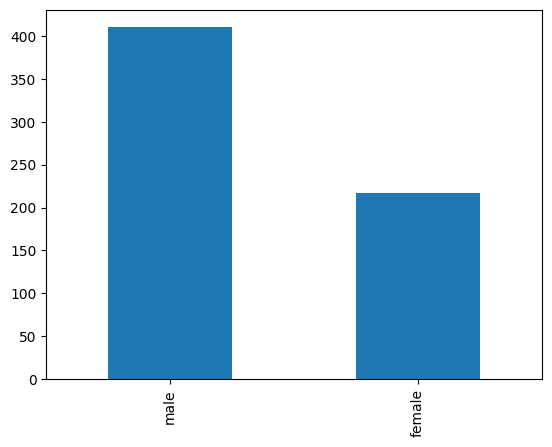

In [10]:
dftrain.sex.value_counts().plot(kind = 'bar' )

Text(0.5, 0, '% survive')

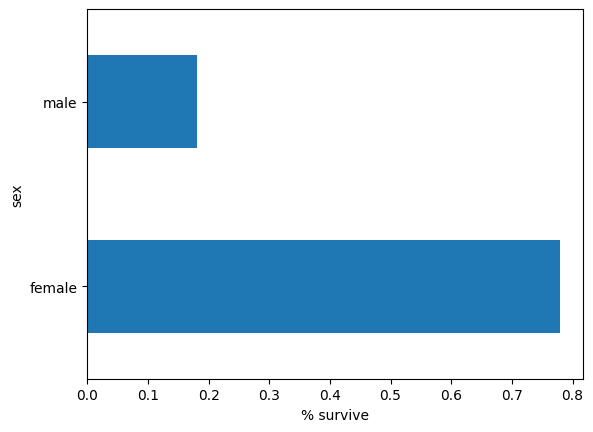

In [11]:
pd.concat([dftrain,y_train], axis=1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('% survive')

now we have to turn categorical data  into numbers


In [12]:
from tensorflow.python import feature_column
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
numeric_columns = ['age', 'fare']

feature_columns = []
for feature_name in categorical_columns:
  vocabulary = dftrain[feature_name].unique() # makes a list of all unique values from the given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in numeric_columns :
  feature_columns.append(tf.feature_column.numeric_column(feature_name,  dtype = tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [13]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

**Training Process**

an **epoch** is simply one stream of our entire dataset

In [14]:
def make_input_fn(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 32):
  def input_function(): #inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) #creates tf.data.Dataset object with data and its labels
    if shuffle:
      ds = ds.shuffle(1000) #randomizes order of data
    ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for number of epochs
    return ds # return batch of the dataset
  return input_function #return a function object for use

train_input_fn = make_input_fn(dftrain, y_train) # call input function that was returned
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs = 1, shuffle = False)

linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data

clear_output() # clears console output
print(result['accuracy'])


0.75757575


In [15]:
print(result)

{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.83281296, 'auc_precision_recall': 0.7962009, 'average_loss': 0.47234154, 'label/mean': 0.375, 'loss': 0.46278423, 'precision': 0.68817204, 'prediction/mean': 0.37285763, 'recall': 0.64646465, 'global_step': 200}


how can we make the model predict?


In [16]:
results = list(linear_est.predict(eval_input_fn))
print(results[0]['probabilities'])

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


[0.9274231  0.07257693]


chances of survival are 0.108

0-did survive

1-didnt survive

Show the details of a random person and the chances of survival,and compare to the data


In [17]:
results = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[116])
print(y_eval.loc[116])
print(results[116]['probabilities'][0])

sex                          male
age                          29.0
n_siblings_spouses              0
parch                           0
fare                        7.875
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 116, dtype: object
0
0.91639787


**Classification**


05-10-2023



Dataset

seperate flowers species

* sepal length
* sepal width
* petal length
* petal width


In [18]:
csv_column_names = ['sepallength','sepalwidth', 'petallength', 'petalwidth', 'species']
species = ['setosa', 'versicolor','virgina']

train_path = tf.keras.utils.get_file("iris_training.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_training.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names = csv_column_names, header = 0)
test = pd.read_csv(test_path, names = csv_column_names , header = 0)


2194/2194 [==============================] - 0s 0us/step


a look into the dataset


In [19]:
train.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [20]:
test.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


pop off the species column


In [21]:
train_y = train.pop('species')
test_y = test.pop('species')
train.head()

,sepallength,sepalwidth,petallength,petalwidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


Input functions

In [22]:
def input_fn(features, labels, training = True, batch_size = 256):
  # convert the inputs to a dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  #shuffle and repeat if we are training
  if training :
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

Feature Columns

In [23]:
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='sepallength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sepalwidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petallength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petalwidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


Building Model

build a  deep neural network classifier

In [24]:
#build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    #2 hidden laers of 30 and 10 nodes respectivelt
    hidden_units = [30,10],
    #model must choose between 3 classes.
    n_classes = 3)

classifier.train(
    input_fn = lambda : input_fn(train,train_y,training = True),
    steps = 5000)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [25]:
eval_result = classifier.evaluate(input_fn=lambda:input_fn(test,test_y,training = False) )
print('\nTest set accuracy : {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy : 0.950



Predictions


In [26]:
def input_fn(features, batch_size = 256):
  #convert the input to a dataset without labels
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['sepallength','sepalwidth', 'petallength', 'petalwidth']
predict = {}

print ("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid:
      val = input(feature + ": ")
      if not val.isdigit():valid = False

    predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda : input_fn(predict))
for pred_dict in predictions:
    print(pred_dict)
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        species[class_id],100 * probability))


Please type numeric values as prompted.
sepallength: 2.1
sepalwidth: 1.8
petallength: 1.6
petalwidth: 1.5
{'logits': array([0.75781703, 0.8661124 , 0.38405678], dtype=float32), 'probabilities': array([0.3568219 , 0.39763406, 0.24554408], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "versicolor" (39.8%)


model works


**Clustering**

06-10-2023


- unsupervise machine learning
-finds clusters of like-data



**K-Means Algorithm**

steps:

1. Randomly pick k points to place k centroids
2. assign all of data points to centroid by distance. closest centroid to a point is assigned.
3. average all points belonging to each centroid to find middle od clusters.
4. reassign every point once againt to the closest centroid
5. reat 3-4 until no point changes which centroid it belongs



**Hidden Markov**

- associated with probablility distribution

* states : finite set of categorical data e.g 'hot' , 'cold', 'warm' etc.
* obeservations : each state has a particular outcome or observation associated with it based on a probability distribution. e.g *Tim has  a 80% chance of being sad on a hot day*
* Transitions : each state will have a probablity defining the likelihood of transitioning to a different state. e.g *a cold day has a 30% chance of being followed by a hot day*

to create a hidden markov model we need
* states
* obeservation distribution
* Transition Distribution

the point is to predict future events based on past events.


**The Weather Prediction Model**


we will model a simple weather system to try to predict the temperature on each day given the following information :    
1. Cold days are encoded by a 0 and hot days are encoded by a 1
2. the first day in our sequence has an 80% chance of being cold
3. A cold day has a 30% chance of being followed by a hot day
4. a hot day has a 20% chance of being followed by a cold day
5. on each day the temperature is normally distributed woth the mean and a standard deviation 0 and 5 on a cold day and a mean and standard deviation 15 and 10 on a hot day

In [27]:
import tensorflow_probability as tfp


In [28]:
tfd = tfp.distributions #shortcut
initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) #point 2
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3], [0.2, 0.8]]) #point 4 and 3
observation_distribution = tfd.Normal(loc=[0., 15.], scale = [5., 10.]) #point 5
#loc argument represents mean and scale is standard deviation

We've now created distribution variables to model our system
now we create the model

In [29]:
model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7
)

the number of steps represents the number of days that we would like to prediction information for. in this case, 7 for 1 week.

to get the expected temperatures on each day we do can the following :     


In [30]:
mean = model.mean()


with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[3.        6.        7.4999995 8.249999  8.625001  8.812501  8.90625  ]


temperature on the first day is 3, and go on and on

**Neural Networks**

09-10-2023


no work done today,sadly

10-10-2023


each nueron has an activation function.

- Relu [0;infinity]
- Tanh [-1; 1]
- Sigmoid [0;1]

- **Loss Function** (cost)

- - calculate how far our output is from the expected value.
- - explanation and types are up on the notebook



* **Gradient Descent**
* - an optimizer algorithm for finding local minimum of a differentiable function

* **

# Creating  Neural Network

**Imports**

In [31]:
from tensorflow import keras

Dataset

MNSIT Fashion Dataset
Dataset has 60,000 images for training and 10,000 testing images


In [32]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data() # split into testing and training


4422102/4422102 [==============================] - 0s 0us/step


lets have a look at the dataset

In [33]:
train_images.shape


(60000, 28, 28)

60,000 images made up of 28 x 28 pixels

lets look at first 10 training labels

In [34]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [35]:
class_names = ['T-shirt/Top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

lets look at what an image looks like

<function matplotlib.pyplot.show(close=None, block=None)>

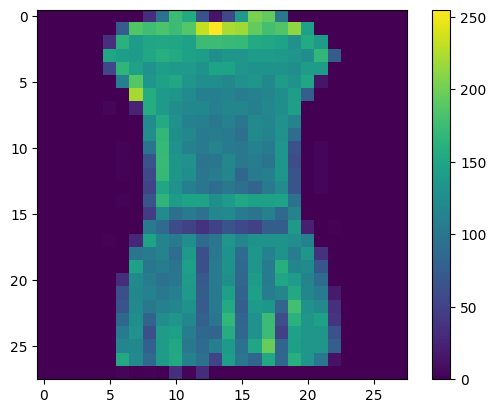

In [36]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show


#Data Preprocessing

scale all of our greyscale pixel values (0-255) to between 0 and 1. We do this by dividing each value in training and testing sets by 255.0 because smaller values make it easier for the model to process values.

In [37]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Building the Model


In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),    # input layer (1)
    keras.layers.Dense(128, activation = 'relu'),   # hidden layer (2)
    keras.layers.Dense(10, activation = 'softmax')  # output layer (3)
])

**Optimizer and Loss**

In [39]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])



In [40]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5013 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3390 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3131 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2820 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2589 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2500 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8852
Test accuracy:  0.885200023651123


model is **overfitting**. test accuracy < training accuracy

* you can change the hyper-parameters. and test again

#Make Predictions

313/313 [==============================] - 1s 2ms/step
Trouser


<function matplotlib.pyplot.show(close=None, block=None)>

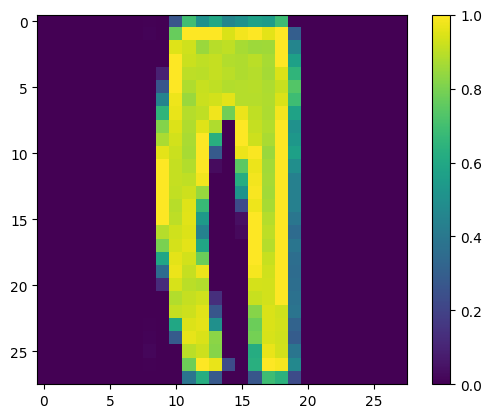

In [42]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show

***

12-10-2023


#Deep Computer Vision

**Convolution Neural Networks**

this helps us classify and detect images or specific objects from within an image

- main properties of a convolution layer {imput size, number of filters,sample size}

*dot product filter and image


#Creating a ConvNet (CNN)

##Dataset

CIFAAR image dataset. has 60,000 32x32 color images with 6000 images of each class

labels:

* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck

**Import Libraries and Dataset**



In [43]:
from tensorflow.keras import datasets, layers,models

Load and split dataset


In [44]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

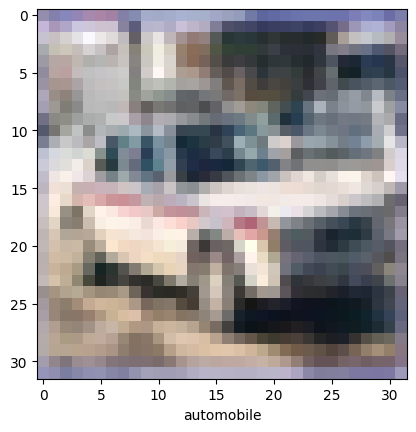

In [45]:
img_index = 65 # will use to change to other images

plt.imshow(train_images[img_index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]])
plt.show

#CNN Architecture

common architecture for CNN is a stack of Conv2d and MaxPooling2d layers followed by a few densely connected layers. Stack of convolution and MaxPooling layers extract features from the image. features are flattened and fed to densly connected layers that determine the class of an image based on features.

start by building a **Convolution Base**


In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu' , input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#Adding Dense Layers

In [48]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#Training


In [50]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 4,
                    validation_data = (test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 15s 6ms/step - loss: 1.5059 - accuracy: 0.4529 - val_loss: 1.3930 - val_accuracy: 0.5024
Epoch 2/4
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1555 - accuracy: 0.5924 - val_loss: 1.0546 - val_accuracy: 0.6237
Epoch 3/4
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0033 - accuracy: 0.6485 - val_loss: 0.9632 - val_accuracy: 0.6599
Epoch 4/4
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9021 - accuracy: 0.6845 - val_loss: 0.9129 - val_accuracy: 0.6827


2#Evaluating Model

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 1s - loss: 0.9129 - accuracy: 0.6827 - 793ms/epoch - 3ms/step
0.682699978351593


13-10-2023

no work was done


16-10-2023


#working with small datasets

##Data Augmentation



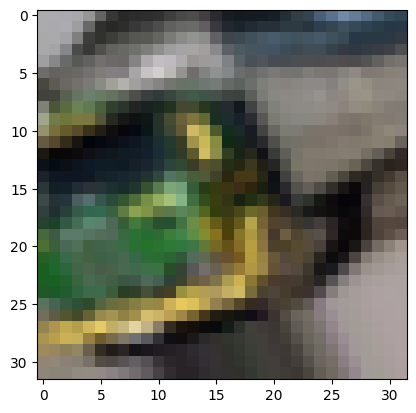

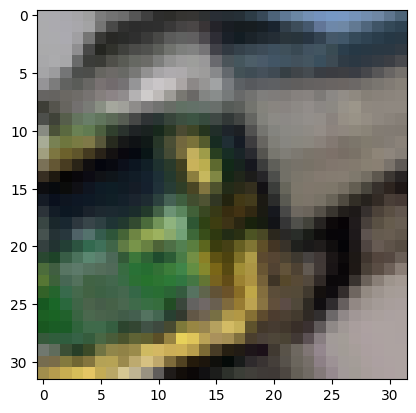

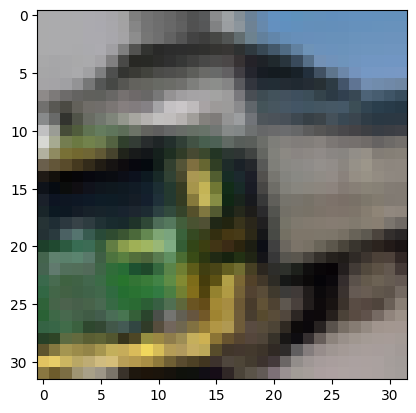

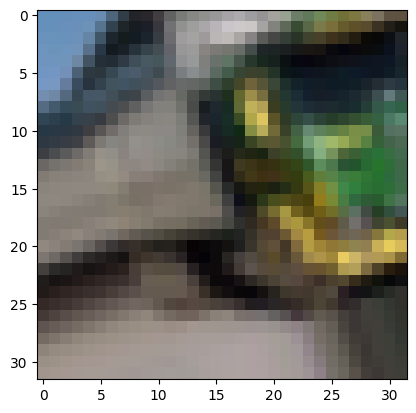

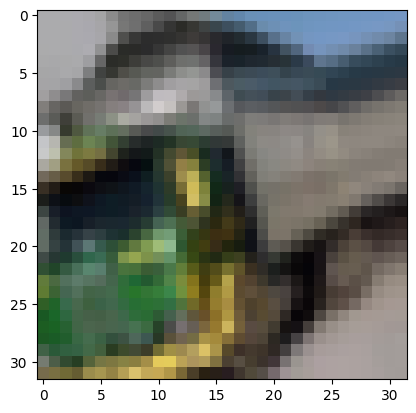

In [52]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#Creates a data generator onject that transforms
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True ,
fill_mode = 'nearest')

#image to transform
test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img,save_prefix = 'test', save_format = 'jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i> 4:
    break

plt.show()

17-10-2023

#Picking a pretrained model


this model is going to use as convolutional base for our model is the **MobileNet V2** developped by Google. the model is trained on 1.4 million images and has 1000 different classes


In [53]:
##img_shape = (img_size, img_size, 3)

# CREATE THE BASE MODEL
##base_model = tf.keras.applications.MobileNetV2(input_shape = img_shape,
                                               ##include_top = False,
                                              ## weights = 'imagenet')

#Natural Language Processing(NLP)



18-10-2023

* Recurring Neural Networks(RNN)

## Sentiment Analysis

process of identifying and categorizing opinions expressed in a piece of text.
in this example, we look at movie reviews and figure out if they are postive, negative or neautral.




### Movie Review Dataset
contains 25,000 reviews where each one is preprocessed.


In [54]:
%tensorflow_version 2.x
#from keras.datasets import imbd
from keras.preprocessing import sequence
import os
vocab_size = 88584

maxlen = 250
batch_size = 64

(train_data, train_labels),(test_data, test_labels) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,

)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
17464789/17464789 [==============================] - 0s 0us/step


In [55]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

more preprocessing

if review has greater than 250 words, trim off extra words, and if less than 250 then add 0s to equal 250

In [56]:
train_data = sequence.pad_sequences(train_data, maxlen)
test_data = sequence.pad_sequences(test_data, maxlen)

## Creating Model

32 stands for the output dimension of the vectors generated by the embedding layer. value can be changed to anything


In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2843041 (10.85 MB)
Trainable params: 2843041 (10.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training Model

In [59]:
model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 63s 97ms/step - loss: 0.4536 - acc: 0.7790 - val_loss: 0.3055 - val_acc: 0.8754
Epoch 2/10
625/625 [==============================] - 24s 38ms/step - loss: 0.2619 - acc: 0.8989 - val_loss: 0.3098 - val_acc: 0.8646
Epoch 3/10
625/625 [==============================] - 15s 25ms/step - loss: 0.2046 - acc: 0.9241 - val_loss: 0.2853 - val_acc: 0.8834
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1666 - acc: 0.9412 - val_loss: 0.2910 - val_acc: 0.8746
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1390 - acc: 0.9513 - val_loss: 0.3259 - val_acc: 0.8866
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1184 - acc: 0.9603 - val_loss: 0.3159 - val_acc: 0.8804
Epoch 7/10
625/625 [==============================] - 10s 15ms/step - loss: 0.1000 - acc: 0.9676 - val_loss: 0.3942 - val_acc: 0.8716
Epoch 8/10
625/625 [==============================] - 10s 16ms

## Making Predictions

In [60]:
word_index = tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], maxlen)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

1641221/1641221 [==============================] - 0s 0us/step
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [61]:
#decode function

reverse_word_index = {value : key for (key, value) in word_index.items()}

def decode_integers(integers):
  pad = 0
  text = ""
  for num in integers :
    if num != pad:
      text += reverse_word_index[num] + " "

  return text[:-1]

print(decode_integers(encoded))

that movie was just amazing so amazing


to make prediction

In [62]:
def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  results = model.predict(pred)
  print(results[0])

positive_review = "that movies was so awesome! i really loved it and would watch it again becaus it was amazingly great"
predict(positive_review)

negative_review = "that movie sucked. i hate it and wouldnt watch it again. was one of the worst things i've ever watched"
predict(negative_review)

1/1 [==============================] - 0s 330ms/step
[0.6483367]
1/1 [==============================] - 0s 20ms/step
[0.05317076]


19-10-2023

# RNN Play Generator

use RNN to generate a play. we will show the RNN an example of something we want  it to create and it will learn to write a version of its own


In [64]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


##Load own Data

In [66]:
##from google.colab import files
##path_to_file = list(files.upload().keys())[0]

##Read Contents of a file

In [67]:
text = open(path_to_file,'rb').read().decode(encoding='utf-8')

print('length of text : {} characters'.format(len(text)))

length of text : 1115394 characters


In [68]:
## look at first 250 characters

print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



##Encoding

encode each unique charecter as a different integer.

In [73]:
vocab = sorted(set(text))
#create a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [72]:
print("Text : ", text[:13])
print("encoded : ", text_to_int(text[:13]))

Text :  First Citizen
encoded :  [18 47 56 57 58  1 15 47 58 47 64 43 52]


function that converts numeric values to text

In [74]:
def int_to_text(ints):
  try:
    ints=ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

First Citizen


##Creating Training Examples

In [75]:
seq_length = 100 #length of sequence for training example
examples_per_epoch = len(text)//(seq_length+1)

#create training examples/ targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [76]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)


split input target


In [77]:
def split_input_target(chunk):
  input_text = chunk[:-1] #hell
  target_text = chunk[1:] #ello
  return input_text,target_text #hell, ello

dataset = sequences.map(split_input_target)

In [78]:
for x, y in dataset.take(2):
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))



EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


EXAMPLE

INPUT
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OUTPUT
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


##Training batches


In [79]:
batch_size=64
covab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

buffer_size=10000
data = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)